In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [3]:
df = pd.read_csv('Tweets.csv')

In [4]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [6]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [7]:
nRowsRead = 1000
df1 = pd.read_csv('Tweets.csv', delimiter = ',', nrows = nRowsRead)
df1.dataframeName = 'Tweets.csv'
nRow, nCol = df1.shape

In [8]:
nRow

1000

In [9]:
nCol

13

In [10]:
df1.head(15)

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
0,1160091065472487424,2019-08-10 13:00:38,NaN,False,False,NaN,1.0,0.0,0.0,# KashmirWithModi \nWith the scrapping of Art...,/Hilladventure1/status/1160091065472487424,1.154411e+18,Hilladventure1
1,1160065502200205312,2019-08-10 11:19:03,NaN,False,False,NaN,0.0,0.0,0.0,Shocking & Shameful! A must read article for...,/samwhitefyr/status/1160065502200205312,9.913207e+17,samwhitefyr
2,1161366914007875584,2019-08-14 01:30:24,NaN,True,False,NaN,0.0,0.0,0.0,"What makes "" True Islam followers"" like you co...",/rashidakhan1977/status/1161366914007875584,7.105491e+17,rashidakhan1977
3,1162074264301785088,2019-08-16 00:21:09,NaN,True,False,NaN,0.0,0.0,0.0,Just sickening to read this thread. I guess it...,/indianbyheart76/status/1162074264301785088,5.796150e+08,indianbyheart76
4,1160566972569939969,2019-08-11 20:31:43,NaN,True,False,NaN,0.0,0.0,0.0,"Don't worry Pyari Behna, whoever opposing or p...",/ShivaprakashYe2/status/1160566972569939969,1.134819e+18,ShivaprakashYe2
5,1160552349691187202,2019-08-11 19:33:36,NaN,False,False,NaN,0.0,0.0,0.0,"The Kasmiris didn't enjoy, but indulged in the...",/RishiBhargava17/status/1160552349691187202,8.054356e+17,RishiBhargava17
6,1161871479731920896,2019-08-15 10:55:21,NaN,False,False,NaN,0.0,0.0,0.0,# KashmirWithModi \n Article 370 and 35A ga...,/abhinavchand16/status/1161871479731920896,1.161869e+18,abhinavchand16
7,1160379841922793472,2019-08-11 08:08:07,NaN,True,False,NaN,0.0,0.0,0.0,"When a big tree falls, the earth shakes. Which...",/sshonti/status/1160379841922793472,8.010942e+17,sshonti
8,1160423711629041665,2019-08-11 11:02:27,NaN,True,False,NaN,0.0,0.0,0.0,Indian action regarding abrogation of article...,/abdulrehman670/status/1160423711629041665,2.911998e+09,abdulrehman670
9,1162297162006487041,2019-08-16 15:06:52,NaN,True,False,NaN,1.0,0.0,0.0,Well Article 370 that Hasan mentions was s...,/rahulmanuwas/status/1162297162006487041,2.972800e+08,rahulmanuwas


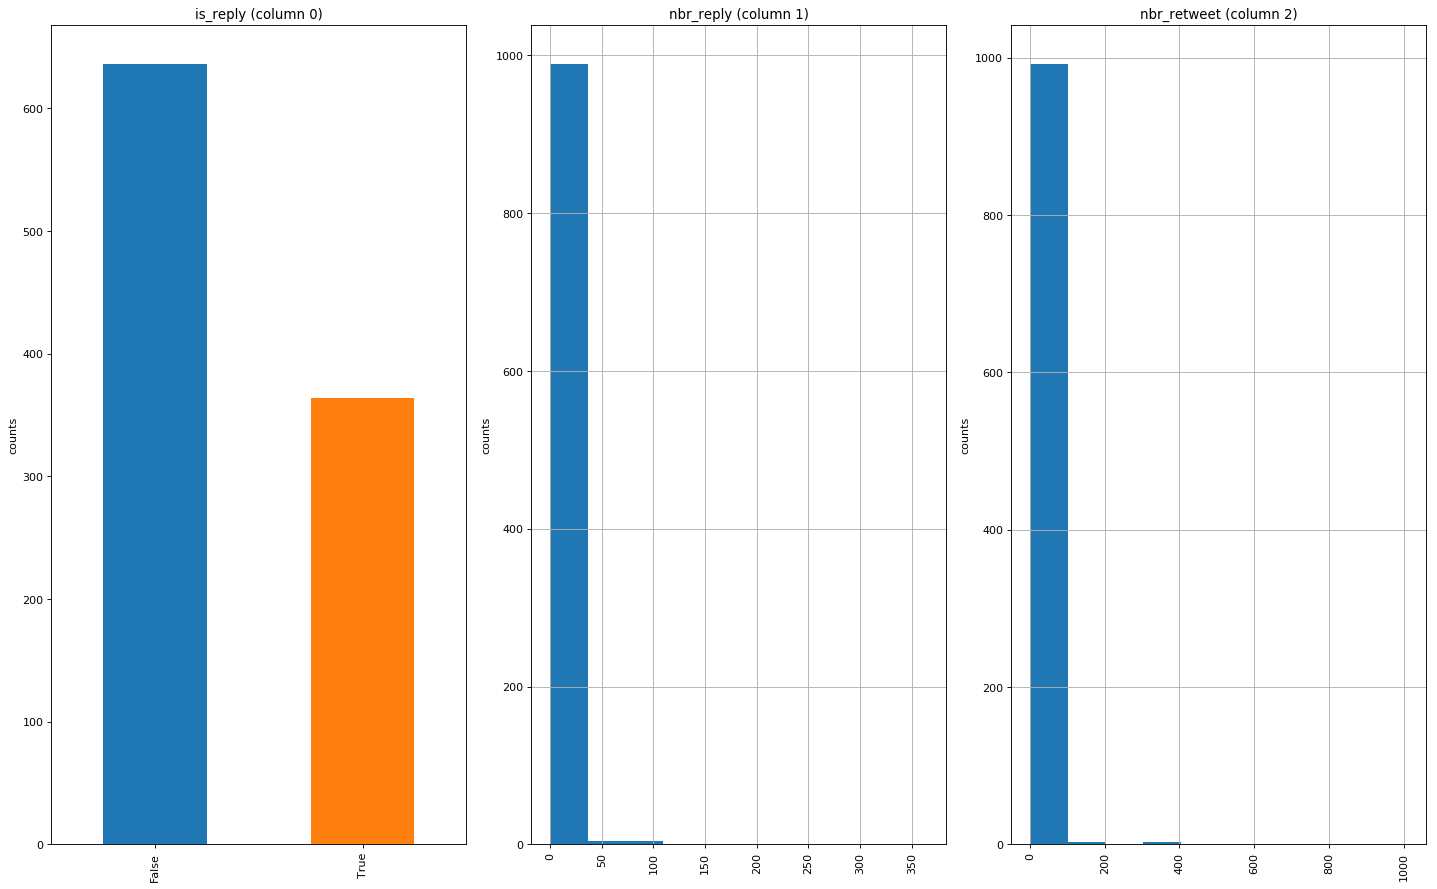

In [11]:
plotPerColumnDistribution(df1,10,5)

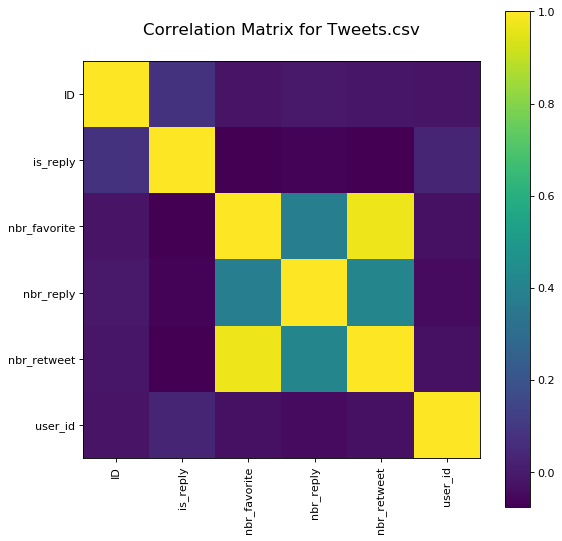

In [12]:
plotCorrelationMatrix(df1,8)

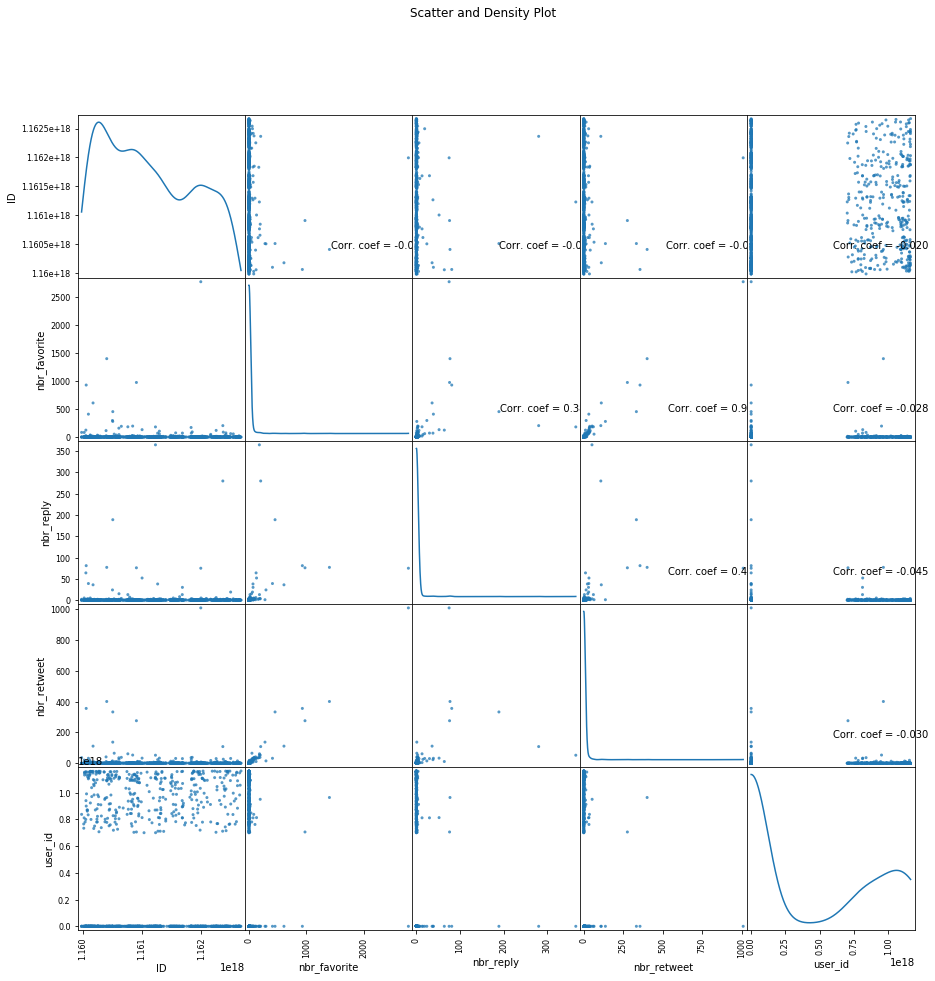

In [13]:
plotScatterMatrix(df1,15,10)

In [14]:
import nltk

In [19]:
delimeter = ' '
df3 = df1.groupby('ID')['text'].apply(lambda x: "%s" % delimeter.join(x)).reset_index()

In [23]:
import textblob

In [25]:
df[['polarity','subjectivity']] = df1['text'].apply

TypeError: 'module' object is not callable